## TidyTuesday
BYOD
1. Running data via Strava
2. Adding new column for Day of Week (DOW)
3. Grouping data on DOW and including mean
4. Visualising the results

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('..//Data//strava_run_data.csv')

In [4]:
data.start_date_converted = pd.to_datetime(data['start_date'])

In [5]:
data['run_dow_raw'] = data['start_date_converted'].dt.dayofweek

In [6]:
def run_day(dow):
    if dow == 0:
        return 'Monday'
    if dow == 1:
        return 'Tuesday'
    if dow == 2:
        return 'Wednesday'
    if dow == 3:
        return 'Thursday'
    if dow == 4:
        return 'Friday'
    if dow == 5:
        return 'Saturday'
    else:
        return 'Sunday'

In [7]:
data['run_dow_converted'] = data['run_dow_raw'].apply(run_day)

In [12]:
rec_data = data[data['year']==2021]

In [13]:
dow = rec_data.groupby(['run_dow_converted'])['distance_km'].agg('mean').reset_index()

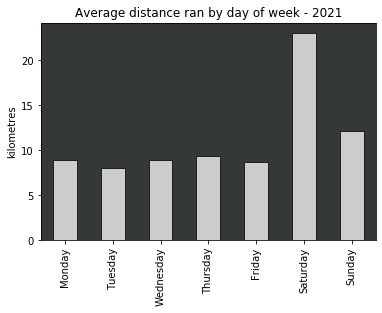

In [14]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

field = 'Day'
ax = dow.set_index('run_dow_converted').loc[day_order].plot(kind="bar", legend=False,color='white',alpha=0.75,edgecolor='k')
ax.set_ylabel('kilometres')
ax.set_xlabel('')
ax.set_title('Average distance ran by day of week - 2021')
ax.set_facecolor('xkcd:charcoal')

In [15]:
dow

,run_dow_converted,distance_km
0,Friday,8.675946
1,Monday,8.961395
2,Saturday,23.031538
3,Sunday,12.163871
4,Thursday,9.374444
5,Tuesday,8.094444
6,Wednesday,8.901000
